In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
data=pd.read_csv("Employee.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [18]:
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [19]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [21]:
data["left"].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["salary"]=le.fit_transform(data["salary"])

In [23]:
x=data[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company", "Work_accident", "promotion_last_5years","salary"]]
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,0,1
1,0.80,0.86,5,262,6,0,0,2
2,0.11,0.88,7,272,4,0,0,2
3,0.72,0.87,5,223,5,0,0,1
4,0.37,0.52,2,159,3,0,0,1
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,1
14995,0.37,0.48,2,160,3,0,0,1
14996,0.37,0.53,2,143,3,0,0,1
14997,0.11,0.96,6,280,4,0,0,1


In [24]:
y=data["left"]
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=100)

In [28]:
# Train Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=100)
dt.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=100)

In [29]:
# Predict on test set
y_pred = dt.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy=metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 98.3%


C:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


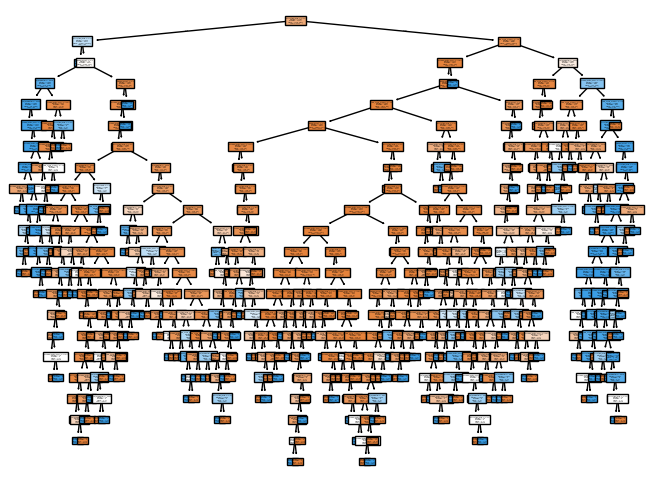

In [36]:
dt.predict([[0.5,0.8,9,260,6,0,1,2]])
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree  
plt.figure(figsize=(8,6))
plot_tree(dt,feature_names=x.columns,class_names=['salary','left'],filled=True)
plt.show()